In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/text.csv")

# visulize data

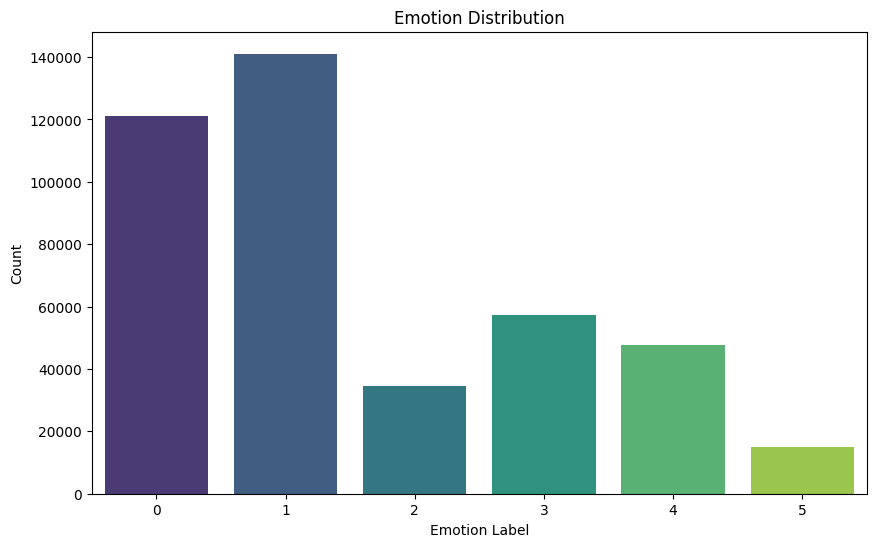

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Emotion Distribution')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.show()

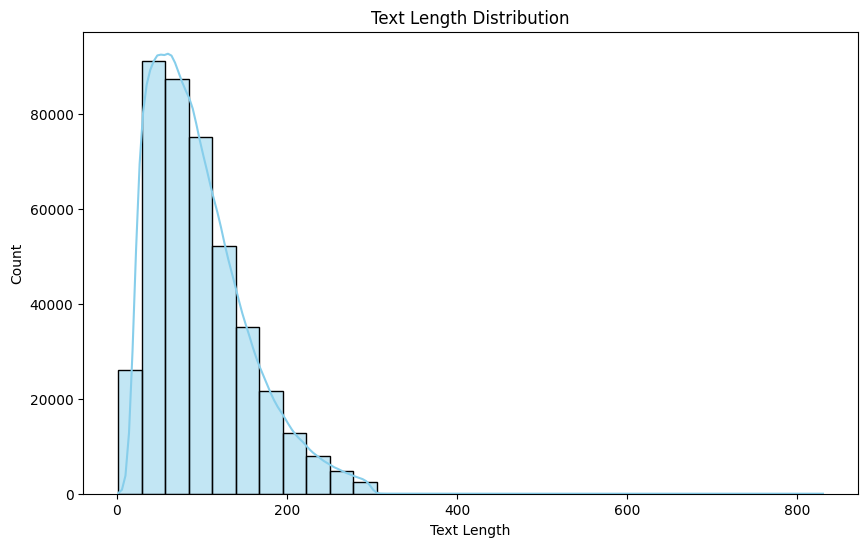

In [4]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='text_length', bins=30, kde=True, color='skyblue')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

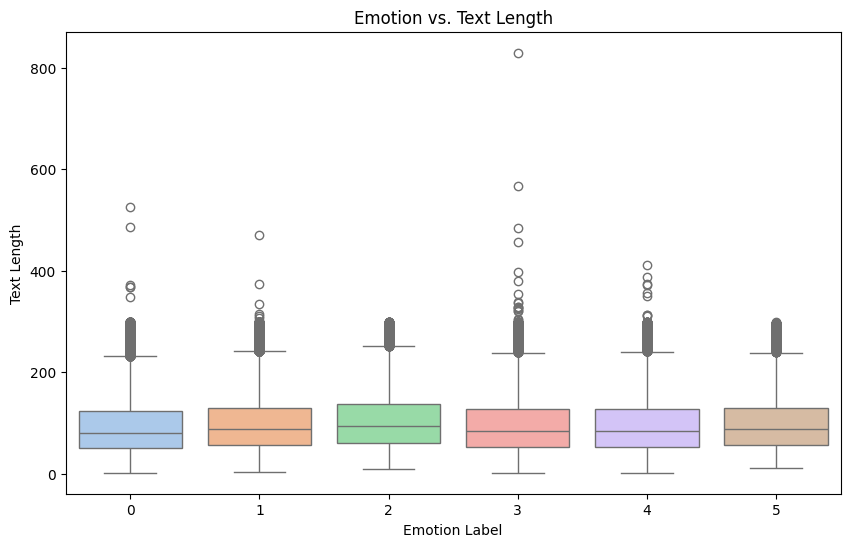

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df, palette='pastel')
plt.title('Emotion vs. Text Length')
plt.xlabel('Emotion Label')
plt.ylabel('Text Length')
plt.show()

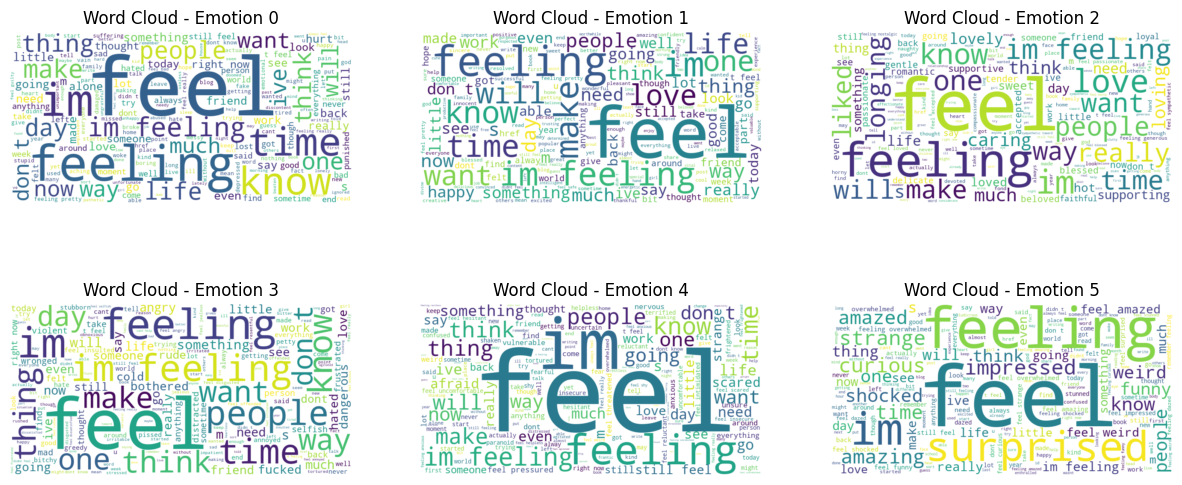

In [6]:
from wordcloud import WordCloud

emotions = df['label'].unique()
plt.figure(figsize=(15, 10))
for emotion in emotions:
    subset = df[df['label'] == emotion]
    text = ' '.join(subset['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.subplot(3, 3, emotion+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Emotion {emotion}')
    plt.axis('off')
plt.show()

# prepare

In [7]:
from sklearn.model_selection import KFold

In [8]:
X = df['text']
y = df['label']

In [9]:
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_vec = vectorizer.fit_transform(X)

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
accuracy_scores = []
classification_reports = []
confusion_matrices = []

# model

In [11]:
# %%
for train_index, test_index in kf.split(X_vec):
    X_train, X_test = X_vec[train_index], X_vec[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=6, random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred, output_dict=True))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

In [12]:
print("\nModel Evaluation:")
print("Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))
print("\nClassification Reports:")
for i, report in enumerate(classification_reports):
    print(f"\nFold {i+1}:\n", pd.DataFrame(report).transpose())
print("\nConfusion Matrices:")
for i, matrix in enumerate(confusion_matrices):
    print(f"\nFold {i+1}:\n", matrix)


Model Evaluation:
Average Accuracy: 0.8927206462504952

Classification Reports:

Fold 1:
               precision    recall  f1-score       support
0              0.946623  0.907667  0.926736  23935.000000
1              0.923038  0.893906  0.908238  28390.000000
2              0.745955  0.926766  0.826588   6964.000000
3              0.925404  0.874925  0.899457  11641.000000
4              0.870971  0.847082  0.858861   9443.000000
5              0.690628  0.941787  0.796886   2989.000000
accuracy       0.894364  0.894364  0.894364      0.894364
macro avg      0.850437  0.898689  0.869461  83362.000000
weighted avg   0.901116  0.894364  0.895916  83362.000000

Fold 2:
               precision    recall  f1-score       support
0              0.945869  0.904704  0.924828  24471.000000
1              0.918963  0.893077  0.905835  28151.000000
2              0.741466  0.925538  0.823339   6876.000000
3              0.929652  0.867096  0.897285  11339.000000
4              0.863743  0.84